

# Retail Sales Analysis and Predictions
###### The data for this analysis was generated using python module Faker. Hence it is a randomly generated sales data for the purposes of demo and showing the functionalities the folllowing: 
- Microsoft Fabric
- Lakehouse
- Databricks
- Spark - pySpark, pySQL, etc
- Machine Learning, etc.



In [3]:
mysalesdata = spark.read.csv('abfss://DataProjectWS@onelake.dfs.fabric.microsoft.com/myLakeHouse.Lakehouse/Files/sales_data.csv', header=True, inferSchema=True)

StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 5, Finished, Available, Finished)

In [23]:
# Let's us show the first five rows of the records
mysalesdata.show(5)

StatementMeta(, a76adb91-fd17-447f-8185-5470c70a1ede, 25, Finished, Available, Finished)

+--------------------+---------------+--------------------+------------+--------------+------+--------+----------------+------------+
|         Customer_ID|  Customer_Name|          Product_ID|Product_Name|      Category| Price|Quantity|Transaction_Date|Total_Amount|
+--------------------+---------------+--------------------+------------+--------------+------+--------+----------------+------------+
|115edf52-1291-402...|     Jay Potter|f9babb05-4ca4-49f...|      Wonder|Home & Kitchen|499.55|       1|      2024-06-20|      499.55|
|7c9b84de-6855-4a4...| Brianna Lawson|34e7bb20-7aab-423...|        More|Home & Kitchen| 83.97|       1|      2024-01-07|       83.97|
|3f849d03-1c23-4f9...|     Tara Klein|c83981d0-ff91-4af...|     Present|      Clothing|464.59|       1|      2024-05-18|      464.59|
|30f2497b-0e1b-4ba...|William Camacho|6ef63984-a996-478...|      Weight|        Sports|143.66|       4|      2024-01-25|      574.64|
|17f4b4b8-53cb-4e4...|  Steven Archer|542a8e0d-e44e-4c6...|   

**2. Data Exploration and Cleaning**
- This shows the exploratory analysis of the ingested data and some data cleaning

In [4]:
# Displaying Schema which allows us to understand the data types
mysalesdata.printSchema()

StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 6, Finished, Available, Finished)

root
 |-- Customer_ID: string (nullable = true)
 |-- Customer_Name: string (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Product_Name: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Transaction_Date: date (nullable = true)
 |-- Total_Amount: double (nullable = true)



In [5]:
# Counting the number of rows
mysalesdata.count()

StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 7, Finished, Available, Finished)

10000

In [8]:
# retruning some basic statistics
mysalesdata.describe().show()

StatementMeta(, a76adb91-fd17-447f-8185-5470c70a1ede, 10, Finished, Available, Finished)

+-------+--------------------+-------------+--------------------+------------+--------+------------------+-----------------+------------------+
|summary|         Customer_ID|Customer_Name|          Product_ID|Product_Name|Category|             Price|         Quantity|      Total_Amount|
+-------+--------------------+-------------+--------------------+------------+--------+------------------+-----------------+------------------+
|  count|               10000|        10000|               10000|       10000|   10000|             10000|            10000|             10000|
|   mean|                null|         null|                null|        null|    null|252.44703800000042|           5.5339|1397.8538209999933|
| stddev|                null|         null|                null|        null|    null|142.51798394104964|2.868636208613727|1144.7084719827365|
|    min|0006f101-2c97-474...| Aaron Becker|001407d8-7b40-411...|           A|Clothing|              5.02|                1|            

# to check for missing values
from pyspark.sql.functions import col, isnan, when, count
mysalesdata.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in mysalesdata.columns]).show()

In [6]:
# drop rows with missing values (if any)
clean_sales_data = mysalesdata.dropna() 

StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 8, Finished, Available, Finished)

In [7]:
# Dispay the first 10 rows of the cleaned sales data
clean_sales_data.show(10)

StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 9, Finished, Available, Finished)

+--------------------+------------------+--------------------+------------+--------------+------+--------+----------------+------------+
|         Customer_ID|     Customer_Name|          Product_ID|Product_Name|      Category| Price|Quantity|Transaction_Date|Total_Amount|
+--------------------+------------------+--------------------+------------+--------------+------+--------+----------------+------------+
|115edf52-1291-402...|        Jay Potter|f9babb05-4ca4-49f...|      Wonder|Home & Kitchen|499.55|       1|      2024-06-20|      499.55|
|7c9b84de-6855-4a4...|    Brianna Lawson|34e7bb20-7aab-423...|        More|Home & Kitchen| 83.97|       1|      2024-01-07|       83.97|
|3f849d03-1c23-4f9...|        Tara Klein|c83981d0-ff91-4af...|     Present|      Clothing|464.59|       1|      2024-05-18|      464.59|
|30f2497b-0e1b-4ba...|   William Camacho|6ef63984-a996-478...|      Weight|        Sports|143.66|       4|      2024-01-25|      574.64|
|17f4b4b8-53cb-4e4...|     Steven Archer|

**3. Data Transformation**
- Let's now perform some transformations, such as aggregating data to understand total sales by category.

In [8]:
# import the functions needed for this step 
from pyspark.sql.functions import sum, col

# aggregating data to get the total sales by category
sales_agg = clean_sales_data.groupBy("Category").agg(sum("Total_Amount").alias("Total_Sales"))

# Display the aggregated value
sales_agg.show()

StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 10, Finished, Available, Finished)

+--------------+------------------+
|      Category|       Total_Sales|
+--------------+------------------+
|Home & Kitchen| 2759888.970000004|
|        Sports|2737896.2499999963|
|   Electronics| 2983571.179999998|
|      Clothing| 2734633.280000002|
|          Toys| 2762548.530000004|
+--------------+------------------+



**4. Visualize the above output**

StatementMeta(, a76adb91-fd17-447f-8185-5470c70a1ede, 41, Finished, Available, Finished)

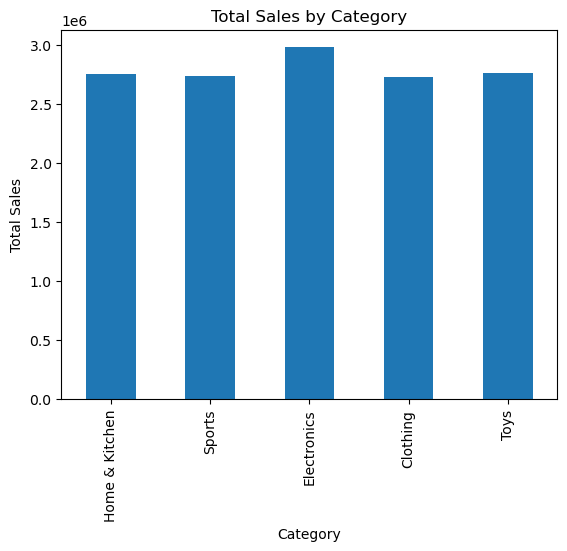

In [39]:
# Convert to Pandas for plotting (optional, can use PySpark for larger datasets)
pandas_df = sales_agg.toPandas()

# Plot using matplotlib
import matplotlib.pyplot as plt

pandas_df.plot(kind="bar", x="Category", y="Total_Sales", legend=False)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

**5. Machine Learning Model for the Sales Data**
- We can build a simple Linear Regression model to predict the total sales based on the price and quantity.

In [9]:
# importing the necessary libraries for Machine learning - VectorAssembler and Linear Regression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 11, Finished, Available, Finished)

In [10]:
# selecting features and label

assembler = VectorAssembler(inputCols=["Price", "Quantity"], outputCol="features")
df_model = assembler.transform(clean_sales_data)


StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 12, Finished, Available, Finished)

In [11]:
# Prepare the final dataset
df_model = df_model.select("features", col("Total_Amount").alias("label"))

# Split the data into training and test sets
train_data, test_data = df_model.randomSplit([0.8, 0.2])

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model
lr_model = lr.fit(train_data)

# Predict on the test data
predictions = lr_model.transform(test_data)

# Show predictions
predictions.select("prediction", "label").show(5)

StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 13, Finished, Available, Finished)

2024-09-03:02:23:41,649 WARNING  [tracking_store.py:153] log_inputs not supported


+------------------+-----+
|        prediction|label|
+------------------+-----+
|-93.81183685307133|25.25|
| 665.5444237518466|46.88|
|-842.9905730340922|12.18|
|-842.3854229332118| 12.4|
| 921.5238868546173|59.85|
+------------------+-----+
only showing top 5 rows



**6. Model Deployment and Evaluation**
- We can now evaluate the model performance and save it for deployment.

In [12]:
# Evaluate the model using RMSE
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(metricName="rmse", labelCol="label", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

StatementMeta(, 7d42ea4f-7a69-477e-8d6a-ea66cbda66b1, 14, Finished, Available, Finished)

2024-09-03:02:24:10,303 WARNING  [tracking_store.py:153] log_inputs not supported


Root Mean Squared Error (RMSE): 406.5491871757073


**7. Documentations and GITHUB**
- Finally, it is important to document each step of the project, and push the notebooks and code to GitHub.

# Initialize a Git repository
git init

# Add your files
git add .

# Commit your changes
git commit -m "Initial commit"

# Push to GitHub
git remote add origin https://github.com/BamideleAdeola/Sales-Analysis-and-forecast---Databricks/tree/main
git push -u origin master